# Visual labeling comparison

A first important step when comparing segmentation algorithms is to visualize the results of the individual algorithms and showing differences between them.

In [1]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt
import pandas as pd

From just visualizing the images, we can see that none pair of the four compared algorithms produce the same label image.

data/blobs_labels_imagej.tif


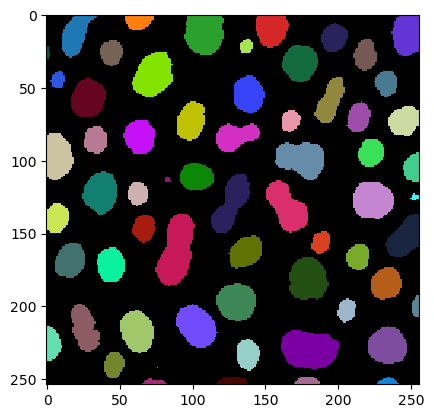

data/blobs_labels_skimage.tif


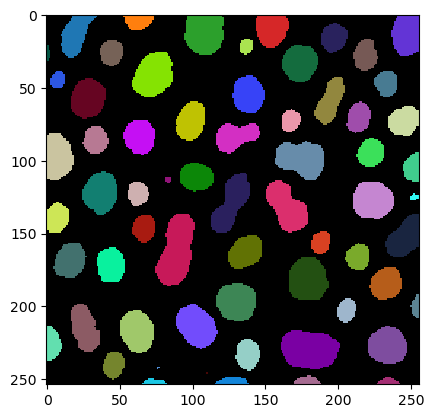

data/blobs_labels_clesperanto_python.tif


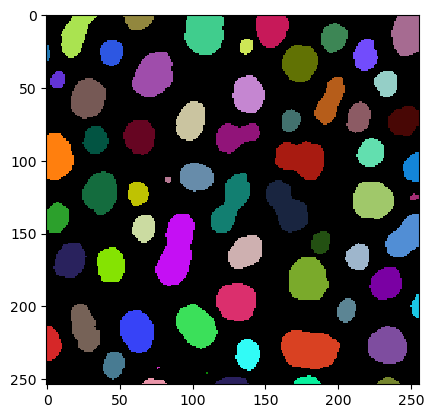

data/blobs_labels_clesperanto_imagej.tif


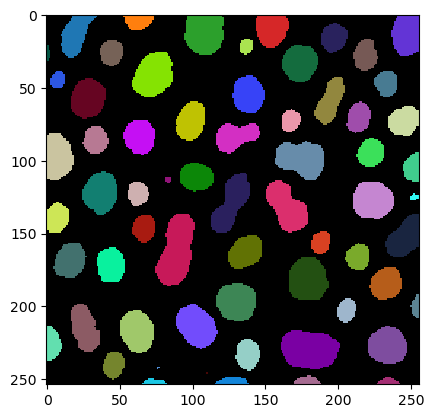

In [2]:
filenames = [
    "data/blobs_labels_imagej.tif",
    "data/blobs_labels_skimage.tif",
    "data/blobs_labels_clesperanto_python.tif",
    "data/blobs_labels_clesperanto_imagej.tif"
]

for filename in filenames:
    print(filename)
    label_image = imread(filename)
    imshow(label_image, labels=True)

As corresponding objects have different colours in this visualization, we can conclude that at least the labels of the objects are differnt. We cannot conclude yet if Otsu's thresholding method delivers different results in the given implementations.

## Difference images
To see the overlap between the different images, we will produce binary images from the label images and visualize the difference between these binary images.

We first compare ImageJ's result and scikit-image's result to demonstrate the procedure.

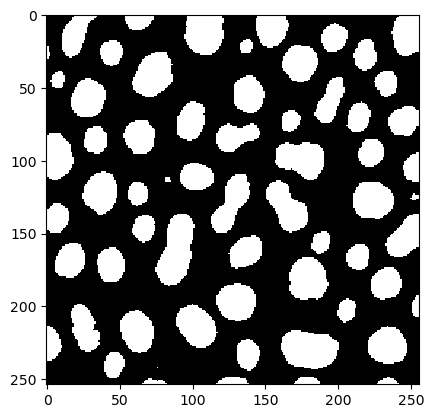

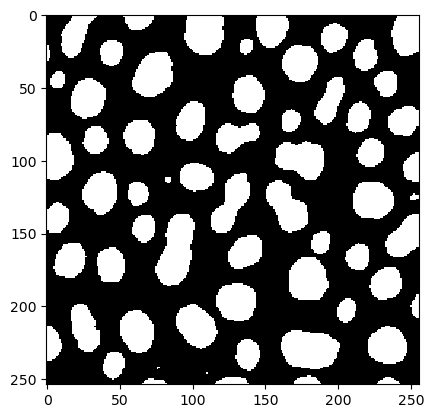

In [3]:
binary_blobs_imagej = imread(filenames[0]) > 0
binary_blobs_skimage = imread(filenames[1]) > 0
imshow(binary_blobs_imagej)
imshow(binary_blobs_skimage)

When looking at these two images carefully, one can already see that objects are a tiny bit larger in the second image.

To produce the `difference` image, we will use [numpy's `logical_xor` method](https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html). It will set all pixels in the `difference` image to 1, where either of the two input binary images are `1`, but not both. It is called the [exclusive-OR operator](https://en.wikipedia.org/wiki/Exclusive_or).

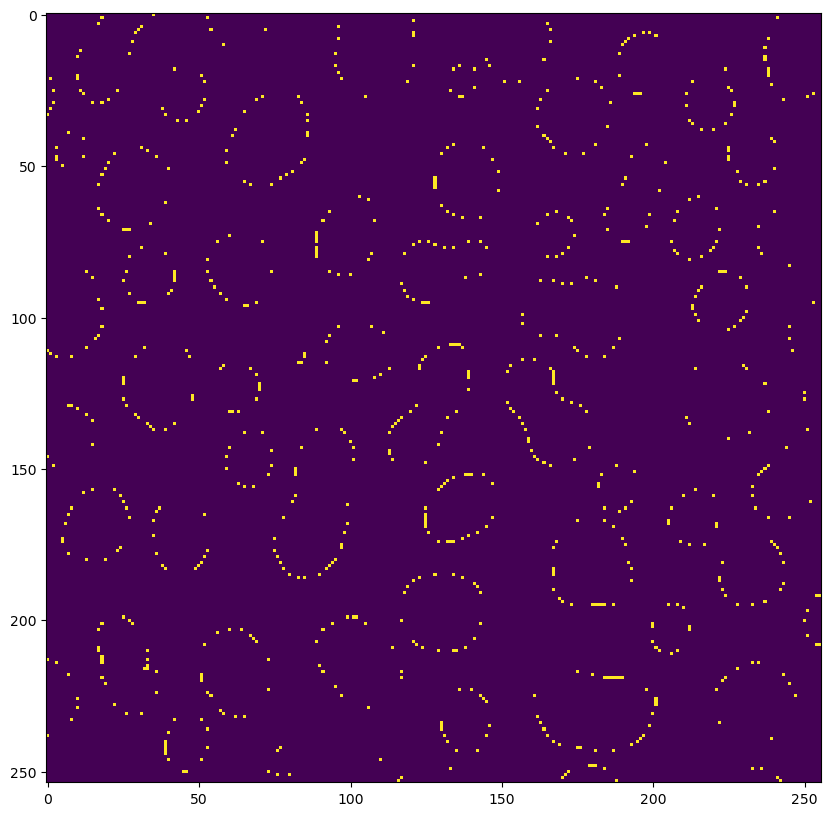

In [4]:
difference = np.logical_xor(binary_blobs_imagej, binary_blobs_skimage)

fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(difference)

From this binary image, we can count the number of pixels that are different between these two approaches:

In [5]:
np.sum(difference)

830

## A matrix of difference-pixel counts
We will now program two for-loops that iterate over pairs of label images and compare them using the same approach. The result will be a 4x4 matrix with the number of pixels that are different when comparing the corresponding algorithm implementations.

In [6]:
matrix = {"Algorithms": filenames}

for filename_A in filenames:
    image_A = imread(filename_A)
    measurements = []
    for filename_B in filenames:
        image_B = imread(filename_B)
        
        difference = np.logical_xor(image_A, image_B)
        number_of_different_pixels = np.sum(difference)
        measurements.append(number_of_different_pixels)
    
    matrix[filename_A] = measurements

In [7]:
pd.DataFrame(matrix)

,Algorithms,data/blobs_labels_imagej.tif,data/blobs_labels_skimage.tif,data/blobs_labels_clesperanto_python.tif,data/blobs_labels_clesperanto_imagej.tif
0,data/blobs_labels_imagej.tif,0,830,830,830
1,data/blobs_labels_skimage.tif,830,0,0,0
2,data/blobs_labels_clesperanto_python.tif,830,0,0,0
3,data/blobs_labels_clesperanto_imagej.tif,830,0,0,0


From this matrix, we can conclude that only the ImageJ result is different from the other three implementations.

## Exercise
Apply the two algorithms `cle.voronoi_otsu_labeling` and `nsbatwm.voronoi_otsu_labeling` to `blobs.tif` (see exercise last week). Compare the segmentation results visually.